In [314]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [315]:
#plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [316]:
import warnings
warnings.filterwarnings('ignore')

# hospitales

In [317]:
#hospitalizados
cdmx= pd.read_csv('/Users/rube/Documents/ironhack/proyecto final/data_covid/traslados-a-hospitales.csv')

In [318]:
cdmx

,Fecha,Alcaldia Inicio,Sector Inicio,LOCATEL,LUGAR DE TRASLADO
0,2020-03-27,MIGUEL HIDALGO,Polanco-Castillo,SI,H. PRIVADO ESPAÑOL
1,2020-03-29,BENITO JUAREZ,Narvarte-Alamos,SI,ISSSTE H. R. GRAL. IGNACIO ZARAGOZA
2,2020-03-31,IZTAPALAPA,Quetzal,SI,IMSS H. G. Z. 28 GABRIEL MANCERA
3,2020-04-03,BENITO JUAREZ,Del Valle,SI,ISSSTE CTO. MED. NAL. 20 DE NOVIEMBRE
4,2020-04-11,GUSTAVO A. MADERO,Pradera,SI,SEDESA H. G. DE LA VILLA
...,...,...,...,...,...
2020,2020-09-05,GUSTAVO A. MADERO,Pradera,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2021,2020-09-05,IZTAPALAPA,Estrella,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2022,2020-09-05,AZCAPOTZALCO,Claveria,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2023,2020-09-05,VENUSTIANO CARRANZA,Congreso,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ


In [319]:
cdmx.drop(['Alcaldia Inicio','Sector Inicio', 'LOCATEL'], inplace=True, axis=1)

In [320]:
imsscdmx = cdmx[cdmx['LUGAR DE TRASLADO'].apply(lambda x:x.startswith('IMSS'))] #seleccionó solo imss

In [321]:
#paso a fecha el indice
imsscdmx['Fecha']= pd.to_datetime(imsscdmx['Fecha'])
imsscdmx.index = pd.DatetimeIndex(imsscdmx['Fecha'])
imsscdmx.drop(['Fecha'], axis=1, inplace=True)
imsscdmx

,LUGAR DE TRASLADO
Fecha,
2020-03-31,IMSS H. G. Z. 28 GABRIEL MANCERA
2020-04-12,IMSS H. G. Z. 27 TLATELOLCO
2020-04-20,IMSS H. G. Z. 8 SAN ÁNGEL
2020-05-11,IMSS H. G. Z. 47 VICENTE GUERRERO
2020-05-12,IMSS H. G. Z. 1-A DR. RODOLFO ANTONIO DE MUCHA...
...,...
2020-09-04,IMSS H. G. Z. 1 CARLOS MAC GREGOR
2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ


In [322]:
#limpio columna hospitales
def limpio_h(x):
    y= x.replace('IMSS ','')
    z= y.replace('.','')
    return z.strip()

In [323]:
imsscdmx['LUGAR DE TRASLADO']= imsscdmx['LUGAR DE TRASLADO'].apply(limpio_h)

In [324]:
top10_hospitales=imsscdmx['LUGAR DE TRASLADO'].value_counts().head(10)
top10_hospitales

H G Z 47 VICENTE GUERRERO                            100
H G Z 1-A DR RODOLFO ANTONIO DE MUCHA M (VENADOS)     88
H G Z 24 INSURGENTES                                  84
H G Z 27 TLATELOLCO                                   82
H G Z 2A TRONCOSO                                     74
H G Z 8 SAN ÁNGEL                                     74
H G Z 1 CARLOS MC GREGOR                              48
H G Z 30 IZTACALCO                                    48
H G R 02 TRAUMATOLOGIA Y ORTOPEDIA VILLA COAPA        45
H G Z 48 S PEDRO XALPA                                40
Name: LUGAR DE TRASLADO, dtype: int64

<AxesSubplot:xlabel='Fecha'>

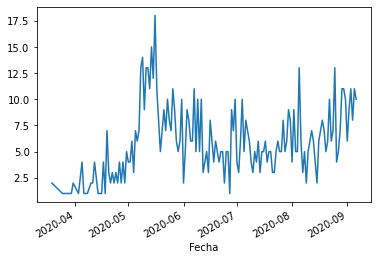

In [325]:
#todo imss
imssfecha=imsscdmx.groupby('Fecha').agg('count')

imssfecha['LUGAR DE TRASLADO'].plot()

In [326]:
#por hospital
imss_dia=pd.get_dummies(imsscdmx['LUGAR DE TRASLADO']).groupby(imsscdmx.index).agg(sum)
imss_mes=pd.get_dummies(imsscdmx['LUGAR DE TRASLADO']).groupby(imsscdmx.index.month).agg(sum)

In [327]:
imss_dia['Total']=imss_dia.sum(axis=1)
imss_dia['Total']

Fecha
2020-03-19     2
2020-03-25     1
2020-03-28     1
2020-03-30     1
2020-03-31     2
              ..
2020-09-02     9
2020-09-03    11
2020-09-04     8
2020-09-05    11
2020-09-06    10
Name: Total, Length: 159, dtype: int64

In [332]:
#hospitales con mas pacientes asociados a covid

fig = make_subplots(rows=2, cols=1,subplot_titles=("por mes","por día"))
#graficas

for i in range(0,10):
    #por mes
    fig.add_trace(go.Bar(x=imss_mes.index, y=imss_mes[top10_hospitales.index[i]]
                         ,name=top10_hospitales.index[i],), row=1,col=1)
#por día
fig.add_trace(go.Scatter(x=imss_dia.index, y=imss_dia['Total'],name='Total',), row=2,col=1)
    

#ejes
fig.update_yaxes(title_text="hospitalizados", row=1, col=1)
fig.update_xaxes(title_text="mes", row=1, col=1)

fig.update_yaxes(title_text="hospitalizados", row=2, col=1)
fig.update_xaxes(title_text="día", row=2, col=1)

#tamaño
fig.update_layout(height=800, width=1000,showlegend=True,
                 legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))

fig.show()

#fig.write_html("/Users/rube/labs-de-ironhack/proyecto-final/graficas_html/hospitalizados_top.html")



# sinave

In [133]:
sinave= pd.read_csv('/Users/rube/Documents/ironhack/proyecto final/data_covid/base-covid-sinave.csv')
sinave

,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,dias_puerperio,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad
0,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. ATANACIO GARZA RIOS,2020-09-10,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
1,FUERA DE USMI,PRIVADA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HOSPITAL SAN ANGEL INN CHAPULTEPEC,2020-05-14,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30
2,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-II QUETZALCOATL,2020-07-23,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
3,USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III MIXCOAC,2020-09-10,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
4,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. JOSE CASTRO VILLAGRANA,2020-07-29,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435853,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-II JOSE M. MORELOS Y PAVON,2020-07-27,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
435854,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HG CM LA RAZA,2020-06-12,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,SI,NO,NaN,NaN,NaN,NaN,NaN,NaN,71-80
435855,USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,INSTITUTO NACIONAL DE CIENCIAS MEDICAS Y NUTRI...,2020-04-05,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81-90
435856,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III BEATRIZ VELAZCO DE ALEMAN.,2020-07-30,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-50


In [134]:
fig= px.pie(values = sinave['sector'].value_counts().head(10), names= (sinave['sector'].value_counts().head(10)).index)
fig.show()
#fig.write_html("/Users/rube/labs-de-ironhack/proyecto-final/graficas_html/sector_salud_pie.html")



In [135]:
sinave_imss = sinave[sinave['sector'].apply(lambda x: x.startswith('IMSS'))]
sinave_imss

,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,dias_puerperio,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad
17,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZ 2A PASO-TRONCOSO,2020-06-10,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
20,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HES CMN SIGLO XXI,2020-07-01,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-50
30,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UNIDAD DE MEDICINA FAMILIAR NO. 49,2020-06-17,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
44,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HPSIQ MF 10 POSTAL,2020-09-14,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
48,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZMF 29 S. JUAN ARAGON,2020-08-19,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,81-90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435802,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HINFEC CM LA RAZA,2020-04-27,MASCULINO,MEXICO,15,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30
435821,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZMF 8 SAN ANGEL,2020-04-05,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
435823,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZ 27 TLATELOLCO,2020-06-16,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,51-60
435842,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UMF 94 S.JUAN ARAGON,2020-05-11,FEMENINO,MEXICO,15,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60


In [136]:
#borro columnas que no sirven

sinave_imss.drop(['origen', 'sector', 'cve_entidad_unidad_medica','municipio_residencia',
       'entidad_unidad_medica', 'delegacion_unidad_medica', 'fecha_de_registro','entidad_residencia',
                 'localidad_residencia','clave_localidad_residencia','evolucion_caso',
       'fecha_defuncion', 'semana_defuncion','nacionalidad','es_indigena',
       'habla_lengua_indigena','fecha_inicio_sintomas','antiviral',
       'fecha_inicio_tratamiento_antiviral','contacto_aves', 'contacto_cerdos', 'contacto_animales',
                 'fecha_estimada_vacunacion', 'toma_muestra', 'laboratorio',
       'folio_laboratorio','es_migrante',
       'pais_nacionalidad', 'pais_origen', 'fecha_ingreso_pais', 'puerperio',
       'dias_puerperio', 'antipireticos', 'unidad_cuidados_intensivos',
       'linaje_influenza_tipo_b', 'viaje_1', 'viaje_2', 'viaje_3', 'viaje_4',
       'viaje_5', 'rango_de_edad'], axis=1, inplace=True)

In [137]:
sinave_imss2= sinave_imss.copy()
sinave_imss2.drop(['recibio_tratamiento_antibiotico', 'unidad_medica','contacto_infeccion_viral','intubado'], axis=1,
                 inplace=True)

In [138]:
sinave_imss2.isnull().sum()

sexo                                0
cve_entidad_residencia              0
cve_municipio_residencia            7
tipo_paciente                       0
diagnostico_clinico_neumonia        3
edad                                0
esta_emabarazada                   39
meses_embarazo                      8
ocupacion                           0
servicio_ingreso                    0
fecha_ingreso                       0
diagnostico_probable                0
fiebre                              0
tos                                 0
odinofagia                          0
disnea                              0
irritabilidad                       0
diarrea                             0
dolor_toracico                      0
calofrios                           0
cefalea                             0
mialgias                            0
artralgias                          0
ataque_al_estado_general            0
rinorrea                            0
polipnea                            0
vomito      

In [139]:
#lleno nulos con ceros
sinave_imss2.fillna(0, inplace=True)
sinave_imss2.isnull().sum()

sexo                             0
cve_entidad_residencia           0
cve_municipio_residencia         0
tipo_paciente                    0
diagnostico_clinico_neumonia     0
edad                             0
esta_emabarazada                 0
meses_embarazo                   0
ocupacion                        0
servicio_ingreso                 0
fecha_ingreso                    0
diagnostico_probable             0
fiebre                           0
tos                              0
odinofagia                       0
disnea                           0
irritabilidad                    0
diarrea                          0
dolor_toracico                   0
calofrios                        0
cefalea                          0
mialgias                         0
artralgias                       0
ataque_al_estado_general         0
rinorrea                         0
polipnea                         0
vomito                           0
dolor_abdominal                  0
conjuntivitis       

In [140]:
#cambio formato a fecha
#importo
import locale
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')
from datetime import datetime as dt

In [141]:
#asigno índice
sinave_imss2['fecha_ingreso']= pd.to_datetime(sinave_imss2['fecha_ingreso'])
sinave_imss2.index =sinave_imss2['fecha_ingreso']
sinave_imss2

,sexo,cve_entidad_residencia,cve_municipio_residencia,tipo_paciente,diagnostico_clinico_neumonia,edad,esta_emabarazada,meses_embarazo,ocupacion,servicio_ingreso,...,VIH_SIDA,otra_condicion,enfermedad_cardiaca,obesidad,insuficiencia_renal_cronica,tabaquismo,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,resultado_definitivo
fecha_ingreso,,,,,,,,,,,,,,,,,,,,,
2020-06-10,FEMENINO,9,7.0,AMBULATORIO,NO,35,NO,0.0,MEDICOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2020-07-01,FEMENINO,9,15.0,AMBULATORIO,NO,41,NO,0.0,EMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2020-06-17,FEMENINO,9,5.0,AMBULATORIO,NO,60,NO,0.0,ENFERMERAS,CONSULTA EXTERNA,...,NO,SI,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2020-09-14,MASCULINO,9,14.0,AMBULATORIO,NO,52,NO,0.0,EMPLEADOS,CONSULTA EXTERNA,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,SARS-CoV-2
2020-08-08,FEMENINO,9,5.0,HOSPITALIZADO,NO,88,NO,0.0,HOGAR,URGENCIAS ADULTOS,...,NO,NO,NO,SI,NO,NO,NO,NO,NO,SARS-CoV-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-27,MASCULINO,15,70.0,AMBULATORIO,NO,25,NO,0.0,LABORATORISTAS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,SI,NO,NO,NO,SARS-CoV-2
2020-03-31,FEMENINO,9,3.0,AMBULATORIO,NO,57,NO,0.0,EMPLEADOS,CONSULTA EXTERNA,...,NO,NO,NO,NO,NO,NO,0,NO,SE IGNORA,NO RECIBIDA
2020-06-16,MASCULINO,9,15.0,HOSPITALIZADO,NO,57,NO,0.0,OTROS,MEDICINA INTERNA,...,NO,NO,NO,SI,NO,NO,SI,SI,NO,SARS-CoV-2


In [142]:
sinave_imss3=sinave_imss2.sort_index()
sinave_imss3

,sexo,cve_entidad_residencia,cve_municipio_residencia,tipo_paciente,diagnostico_clinico_neumonia,edad,esta_emabarazada,meses_embarazo,ocupacion,servicio_ingreso,...,VIH_SIDA,otra_condicion,enfermedad_cardiaca,obesidad,insuficiencia_renal_cronica,tabaquismo,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,resultado_definitivo
fecha_ingreso,,,,,,,,,,,,,,,,,,,,,
2020-01-02,MASCULINO,9,2.0,AMBULATORIO,NO,5,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
2020-01-02,MASCULINO,9,5.0,AMBULATORIO,NO,8,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
2020-01-02,FEMENINO,9,8.0,AMBULATORIO,NO,3,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,SI,NO,NO,NO,SI,SI,NO,A H3
2020-01-02,MASCULINO,9,5.0,AMBULATORIO,NO,3,NO,0.0,DESEMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
2020-01-02,FEMENINO,9,5.0,HOSPITALIZADO,SI,29,NO,0.0,MEDICOS,URGENCIAS ADULTOS,...,NO,NO,NO,NO,NO,SI,SI,SI,NO,INF AH1N1 PMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,MASCULINO,9,14.0,HOSPITALIZADO,SI,68,NO,0.0,DESEMPLEADOS,URGENCIAS ADULTOS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,0
2020-09-26,MASCULINO,9,12.0,HOSPITALIZADO,SI,35,NO,0.0,OTROS,URGENCIAS ADULTOS,...,NO,NO,NO,NO,NO,SI,NO,NO,NO,0
2020-09-26,FEMENINO,9,15.0,AMBULATORIO,NO,46,NO,0.0,ENFERMERAS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,0


In [143]:
#lleno con cero y uno
comorbolidades = ['diagnostico_clinico_neumonia','esta_emabarazada',
    'fiebre', 'tos', 'odinofagia',
       'disnea', 'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios',
       'cefalea', 'mialgias', 'artralgias', 'ataque_al_estado_general',
       'rinorrea', 'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis',
       'cianosis', 'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma',
       'inmunosupresivo', 'hipertension', 'VIH_SIDA', 'otra_condicion',
       'enfermedad_cardiaca', 'obesidad', 'insuficiencia_renal_cronica',
       'tabaquismo', 'recibio_tratamiento', 'recibio_tratamiento_antiviral',
       'vacunado']

In [144]:
for i in comorbolidades:
    sinave_imss3[i]=np.where(sinave_imss3[i]=='SI',1,0)

In [145]:
sinave_imss3.dtypes

sexo                                     object
cve_entidad_residencia                    int64
cve_municipio_residencia                float64
tipo_paciente                            object
diagnostico_clinico_neumonia              int64
edad                                      int64
esta_emabarazada                          int64
meses_embarazo                          float64
ocupacion                                object
servicio_ingreso                         object
fecha_ingreso                    datetime64[ns]
diagnostico_probable                     object
fiebre                                    int64
tos                                       int64
odinofagia                                int64
disnea                                    int64
irritabilidad                             int64
diarrea                                   int64
dolor_toracico                            int64
calofrios                                 int64
cefalea                                 

In [146]:
sinave_imss3['Masculino']=np.where(sinave_imss3['sexo']=='Masculino',1,0)
sinave_imss3['Femenino'] = np.where(sinave_imss3['sexo']=='Femenino',1,0)
sinave_imss3['Ambulatorio']= np.where(sinave_imss3['tipo_paciente']=='AMBULATORIO',1,0)
sinave_imss3['HOSPITALIZADO']=np.where(sinave_imss3['tipo_paciente']=='HOSPITALIZADO',1,0)
sinave_imss3['tiene_covid19']=np.where(sinave_imss3['resultado_definitivo']=='SARS-CoV-2',1,0)




In [147]:
sinave_imss3['negativo_covid19']=np.where(sinave_imss3['resultado_definitivo']!='SARS-CoV-2',1,0)


In [148]:
#funcion para saber si es urgencia
def urgencias(x):
    import re
    return bool(re.search('URGENCIA',x))
    

In [149]:
import re
sinave_imss3['urgencia']=np.where(sinave_imss3['servicio_ingreso'].apply(urgencias),1,0)

In [150]:
sinave_imss3['ocupacion'].value_counts() #insights antes de la prediccion hay muchos otros

EMPLEADOS                                         15170
OTROS                                             10989
HOGAR                                              7471
ENFERMERAS                                         6881
OTROS TRABAJADORES DE LA SALUD                     5885
MEDICOS                                            5395
DESEMPLEADOS                                       5129
JUBILADO / PENSIONADO                              4199
ESTUDIANTES                                        1718
CHOFERES                                           1179
OTROS PROFESIONISTAS                               1159
COMERCIANTES DE MERCADOS FIJOS O AMBULANTES         991
OBREROS                                             832
LABORATORISTAS                                      548
GERENTES O PROPIETARIOS DE EMPRESAS O NEGOCIOS      458
MAESTROS                                            185
DENTISTAS                                            97
CAMPESINOS                                      

In [151]:
#borrar fecha que no es indice, sexo, tipo de paciente, diagnostico probable y resultado definitivo
sinave_imss4=sinave_imss3.copy()

sinave_imss4.drop(['sexo','tipo_paciente', 'resultado_definitivo', 'diagnostico_probable', 'fecha_ingreso',
                   'servicio_ingreso', 'ocupacion'],
                 axis =1, inplace=True)



In [152]:
#agrupo por fecha
sinave_imss5= sinave_imss4.groupby(sinave_imss4.index).agg('sum')

In [153]:
#borro columnas categoricas
sinave_imss5.drop(['cve_entidad_residencia', 'cve_municipio_residencia','edad','meses_embarazo'],axis =1, inplace=True)

<AxesSubplot:>

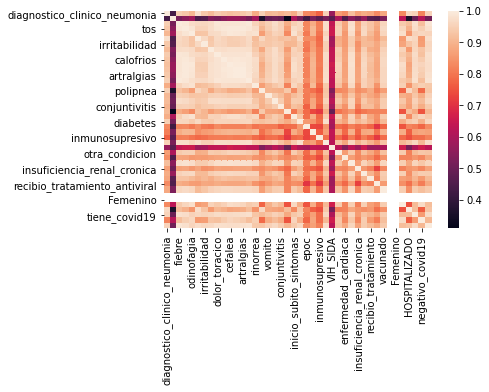

In [154]:
sns.heatmap(sinave_imss5.corr()) #no hay correlación aparente

In [155]:
#series de tiempo importo
import statsmodels.api as sm
import matplotlib.pyplot as plt

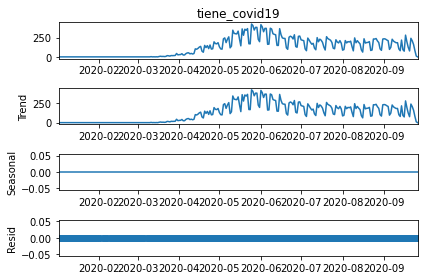

In [156]:
res = sm.tsa.seasonal_decompose(sinave_imss5['tiene_covid19'], freq=1)
resplot = res.plot()

In [157]:
#hago prueba de adfuller
from statsmodels.tsa.stattools import adfuller

In [158]:
adfuller(sinave_imss5['tiene_covid19']['2020-04-01':]) #no es estacionario :|

(-1.5304219079347425,
 0.5184119941304541,
 14,
 164,
 {'1%': -3.47086589632514, '5%': -2.879330279087651, '10%': -2.57625492712671},
 1683.161424454352)

In [159]:
#agrego mes
import datetime
sinave_imss5['mes']=sinave_imss5.index.month


In [160]:
#exporto csv

#sinave_imss5.to_csv('/Users/rube/Documents/ironhack/proyecto final/data_limpia/sinave_imss_sept.csv')

In [161]:
sinave_mes=sinave_imss5.groupby('mes').agg({'tiene_covid19':'sum','negativo_covid19':'sum',
                                 'HOSPITALIZADO':'sum','Ambulatorio':'sum'})
sinave_mes

,tiene_covid19,negativo_covid19,HOSPITALIZADO,Ambulatorio
mes,,,,
1,0,278,118,160
2,0,171,68,103
3,218,1208,391,1035
4,2772,3385,2805,3352
5,8128,5754,6309,7573
6,7803,6549,4946,9406
7,5651,6242,3586,8307
8,5202,5380,3118,7464
9,4058,5530,2588,7000


In [131]:
fig = make_subplots(rows=1, cols=2,subplot_titles=('positivos vs negativos', 'hospitalización'))

#graficas
fig.add_trace(go.Scatter( x=sinave_mes.index, y=sinave_mes['tiene_covid19'],name='positivo'), row=1,col=1)
fig.add_trace(go.Scatter( x=sinave_mes.index, y=sinave_mes['negativo_covid19'], name='negativo'), row=1,col=1)

fig.add_trace(go.Scatter( x=sinave_mes.index, y=sinave_mes['HOSPITALIZADO'],name='hospitalizado'), row=1,col=2)
fig.add_trace(go.Scatter( x=sinave_mes.index, y=sinave_mes['Ambulatorio'], name='ambulatorio'), row=1,col=2)

#ejes
fig.update_yaxes(title_text="pacientes", row=1, col=1)
fig.update_yaxes(title_text="pacientes", row=1, col=2)
fig.update_xaxes(title_text="mes", row=1, col=2)
fig.update_xaxes(title_text="mes", row=1, col=1)


#titulo
fig.update_layout(height=600, width=1000, title_text="pacientes al 28 septiembre 2020 IMSS",)
fig.show()

#guardo html
#fig.write_html("/Users/rube/labs-de-ironhack/proyecto-final/pacientes_imss_2020.html")


# probando modelo categorico Clasificación

In [162]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts

In [163]:
from sklearn.metrics import confusion_matrix

In [164]:
from sklearn.metrics import r2_score

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
from sklearn.metrics import accuracy_score as acc

In [290]:
#todo
X_train, X_test, y_train, y_test=tts(sinave_imss4[['diagnostico_clinico_neumonia', 'edad', 'esta_emabarazada',
       'meses_embarazo', 'fiebre', 'tos', 'odinofagia', 'disnea',
       'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios', 'cefalea',
       'mialgias', 'artralgias', 'ataque_al_estado_general', 'rinorrea',
       'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       'recibio_tratamiento', 'recibio_tratamiento_antiviral', 'vacunado',
       'Masculino','Femenino', 'Ambulatorio', 'HOSPITALIZADO','urgencia']]
                                                   , sinave_imss4['tiene_covid19'], test_size=0.1)

In [291]:
#solo con comorbilidades
X_train2, X_test2, y_train2, y_test2=tts(sinave_imss4[[ 'edad','diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo', 'vacunado',
       'Ambulatorio', 'HOSPITALIZADO','urgencia'
       ]]
                                                   , sinave_imss4['tiene_covid19'], test_size=0.1)

In [254]:
%%time
svc=SVC().fit(X_train, y_train)

y_pred1=svc.predict(X_test)

CPU times: user 6min 50s, sys: 5.05 s, total: 6min 55s
Wall time: 7min 9s


In [255]:
acc(y_test, y_pred1)

0.6083711400556124

In [292]:
%%time
#regresión logistica

logit_reg = LogisticRegression()
logit_fit = logit_reg.fit(X_train,y_train)
y_pred_0 = logit_fit.predict(X_test)

CPU times: user 1.83 s, sys: 109 ms, total: 1.94 s
Wall time: 1.09 s


In [293]:
acc(y_test, y_pred_0)

0.6063222596224206

In [173]:
confusion_matrix(y_test, y_pred)

array([[4292, 2620],
       [2743, 4011]])

In [268]:
%%time
#regresión logistica con menos columnas

logit_reg = LogisticRegression()
logit_fit = logit_reg.fit(X_train2,y_train2)
y_pred_m = logit_fit.predict(X_test2)

CPU times: user 1.12 s, sys: 79.4 ms, total: 1.2 s
Wall time: 691 ms


In [269]:
acc(y_test2, y_pred_m)

0.5783696765695887

In [176]:
from sklearn.linear_model import SGDClassifier as SGDC

In [177]:
from sklearn.naive_bayes import GaussianNB as GNB #Bayes para regresion 
from sklearn.naive_bayes import MultinomialNB as MNB #Bayes con variables discretas (categoricas)
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.naive_bayes import BernoulliNB as BNB 
from sklearn.ensemble import GradientBoostingClassifier as GBC


In [252]:
%%time
sgdc=SGDC().fit(X_train,y_train)
y_pred2= sgdc.predict(X_test)

CPU times: user 4.31 s, sys: 72 ms, total: 4.38 s
Wall time: 4.62 s


In [253]:
acc(y_test, y_pred2)

0.574271915703205

In [180]:
%%time
gnb=GNB().fit(X_train,y_train)
y_pred3= gnb.predict(X_test)

CPU times: user 135 ms, sys: 37.8 ms, total: 173 ms
Wall time: 90 ms


In [181]:
acc(y_test, y_pred3)

0.5971754719742427

In [182]:
%%time
mnb=MNB().fit(X_train,y_train)
y_pred4=mnb.predict(X_test)

CPU times: user 57.2 ms, sys: 23.7 ms, total: 80.8 ms
Wall time: 56.4 ms


In [183]:
acc(y_test, y_pred4)

0.5436850578076979

In [272]:
%%time
mnb=MNB().fit(X_train2,y_train2)
y_pred4_m=mnb.predict(X_test2)

CPU times: user 24.3 ms, sys: 3.14 ms, total: 27.4 ms
Wall time: 31.4 ms


In [273]:
acc(y_test2, y_pred4_m)

0.5657836967656958

In [184]:
%%time
cnb=CNB().fit(X_train,y_train)
y_pred5=mnb.predict(X_test)

CPU times: user 58.7 ms, sys: 12.3 ms, total: 71 ms
Wall time: 69.8 ms


In [185]:
acc(y_test, y_pred5)

0.5436850578076979

In [186]:
%%time
bnb= BNB().fit(X_train,y_train)
y_pred6=bnb.predict(X_test)

CPU times: user 138 ms, sys: 23.5 ms, total: 162 ms
Wall time: 91 ms


In [187]:
acc(y_test, y_pred6)

0.6017122786477389

In [188]:
%%time
gbc= GBC().fit(X_train,y_train)
y_pred7=bnb.predict(X_test)

CPU times: user 8.93 s, sys: 316 ms, total: 9.24 s
Wall time: 9.99 s


In [189]:
acc(y_test, y_pred7)

0.6017122786477389

In [190]:
from catboost import CatBoostClassifier as CATB

In [191]:
%%time
catb=CATB().fit(X_train,y_train)
y_pred7=bnb.predict(X_test)

Learning rate set to 0.056876
0:	learn: 0.6898004	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.6867725	total: 120ms	remaining: 59.8s
2:	learn: 0.6843898	total: 176ms	remaining: 58.6s
3:	learn: 0.6819486	total: 264ms	remaining: 1m 5s
4:	learn: 0.6796208	total: 360ms	remaining: 1m 11s
5:	learn: 0.6776311	total: 420ms	remaining: 1m 9s
6:	learn: 0.6758638	total: 466ms	remaining: 1m 6s
7:	learn: 0.6742426	total: 498ms	remaining: 1m 1s
8:	learn: 0.6726862	total: 521ms	remaining: 57.4s
9:	learn: 0.6713293	total: 545ms	remaining: 53.9s
10:	learn: 0.6701720	total: 564ms	remaining: 50.7s
11:	learn: 0.6691276	total: 588ms	remaining: 48.4s
12:	learn: 0.6680839	total: 612ms	remaining: 46.5s
13:	learn: 0.6671096	total: 654ms	remaining: 46s
14:	learn: 0.6661980	total: 741ms	remaining: 48.7s
15:	learn: 0.6653938	total: 819ms	remaining: 50.4s
16:	learn: 0.6646161	total: 892ms	remaining: 51.6s
17:	learn: 0.6639200	total: 952ms	remaining: 51.9s
18:	learn: 0.6633170	total: 995ms	remaining: 51.4s
19:	learn: 

161:	learn: 0.6411018	total: 6.17s	remaining: 31.9s
162:	learn: 0.6410330	total: 6.25s	remaining: 32.1s
163:	learn: 0.6409435	total: 6.29s	remaining: 32.1s
164:	learn: 0.6408858	total: 6.39s	remaining: 32.3s
165:	learn: 0.6408496	total: 6.44s	remaining: 32.4s
166:	learn: 0.6407869	total: 6.49s	remaining: 32.4s
167:	learn: 0.6407433	total: 6.54s	remaining: 32.4s
168:	learn: 0.6406532	total: 6.57s	remaining: 32.3s
169:	learn: 0.6406031	total: 6.6s	remaining: 32.2s
170:	learn: 0.6405297	total: 6.63s	remaining: 32.2s
171:	learn: 0.6404531	total: 6.67s	remaining: 32.1s
172:	learn: 0.6403796	total: 6.7s	remaining: 32s
173:	learn: 0.6402508	total: 6.72s	remaining: 31.9s
174:	learn: 0.6401997	total: 6.74s	remaining: 31.8s
175:	learn: 0.6401395	total: 6.77s	remaining: 31.7s
176:	learn: 0.6400535	total: 6.79s	remaining: 31.6s
177:	learn: 0.6399548	total: 6.82s	remaining: 31.5s
178:	learn: 0.6399158	total: 6.85s	remaining: 31.4s
179:	learn: 0.6398533	total: 6.88s	remaining: 31.3s
180:	learn: 0.63

323:	learn: 0.6295898	total: 11.1s	remaining: 23.2s
324:	learn: 0.6295000	total: 11.2s	remaining: 23.2s
325:	learn: 0.6294637	total: 11.2s	remaining: 23.1s
326:	learn: 0.6293987	total: 11.2s	remaining: 23.1s
327:	learn: 0.6293681	total: 11.3s	remaining: 23.1s
328:	learn: 0.6293234	total: 11.3s	remaining: 23.1s
329:	learn: 0.6292541	total: 11.4s	remaining: 23.2s
330:	learn: 0.6291664	total: 11.5s	remaining: 23.2s
331:	learn: 0.6290671	total: 11.5s	remaining: 23.2s
332:	learn: 0.6290166	total: 11.6s	remaining: 23.2s
333:	learn: 0.6289503	total: 11.6s	remaining: 23.2s
334:	learn: 0.6289039	total: 11.6s	remaining: 23.1s
335:	learn: 0.6288646	total: 11.7s	remaining: 23.1s
336:	learn: 0.6288408	total: 11.7s	remaining: 23s
337:	learn: 0.6288170	total: 11.7s	remaining: 23s
338:	learn: 0.6287508	total: 11.8s	remaining: 23s
339:	learn: 0.6286868	total: 11.8s	remaining: 22.9s
340:	learn: 0.6286164	total: 11.8s	remaining: 22.9s
341:	learn: 0.6285587	total: 11.9s	remaining: 22.9s
342:	learn: 0.6285

483:	learn: 0.6208783	total: 17.6s	remaining: 18.8s
484:	learn: 0.6208419	total: 17.6s	remaining: 18.7s
485:	learn: 0.6208201	total: 17.7s	remaining: 18.7s
486:	learn: 0.6207796	total: 17.7s	remaining: 18.6s
487:	learn: 0.6207335	total: 17.7s	remaining: 18.6s
488:	learn: 0.6206635	total: 17.7s	remaining: 18.5s
489:	learn: 0.6206279	total: 17.8s	remaining: 18.5s
490:	learn: 0.6205925	total: 17.8s	remaining: 18.4s
491:	learn: 0.6205219	total: 17.8s	remaining: 18.4s
492:	learn: 0.6204973	total: 17.9s	remaining: 18.4s
493:	learn: 0.6204207	total: 17.9s	remaining: 18.3s
494:	learn: 0.6203541	total: 17.9s	remaining: 18.3s
495:	learn: 0.6203203	total: 18s	remaining: 18.2s
496:	learn: 0.6202434	total: 18s	remaining: 18.2s
497:	learn: 0.6201952	total: 18s	remaining: 18.2s
498:	learn: 0.6201152	total: 18.1s	remaining: 18.1s
499:	learn: 0.6200478	total: 18.1s	remaining: 18.1s
500:	learn: 0.6199653	total: 18.1s	remaining: 18s
501:	learn: 0.6199123	total: 18.2s	remaining: 18s
502:	learn: 0.6198565	

642:	learn: 0.6134491	total: 23.1s	remaining: 12.8s
643:	learn: 0.6134046	total: 23.2s	remaining: 12.8s
644:	learn: 0.6133523	total: 23.2s	remaining: 12.8s
645:	learn: 0.6133246	total: 23.3s	remaining: 12.8s
646:	learn: 0.6132886	total: 23.3s	remaining: 12.7s
647:	learn: 0.6132517	total: 23.3s	remaining: 12.7s
648:	learn: 0.6132318	total: 23.4s	remaining: 12.6s
649:	learn: 0.6131797	total: 23.4s	remaining: 12.6s
650:	learn: 0.6131525	total: 23.4s	remaining: 12.6s
651:	learn: 0.6130954	total: 23.5s	remaining: 12.5s
652:	learn: 0.6130216	total: 23.5s	remaining: 12.5s
653:	learn: 0.6129897	total: 23.5s	remaining: 12.4s
654:	learn: 0.6129205	total: 23.5s	remaining: 12.4s
655:	learn: 0.6128449	total: 23.6s	remaining: 12.4s
656:	learn: 0.6127778	total: 23.6s	remaining: 12.3s
657:	learn: 0.6127589	total: 23.6s	remaining: 12.3s
658:	learn: 0.6127215	total: 23.6s	remaining: 12.2s
659:	learn: 0.6126627	total: 23.7s	remaining: 12.2s
660:	learn: 0.6126367	total: 23.7s	remaining: 12.1s
661:	learn: 

805:	learn: 0.6073409	total: 27.9s	remaining: 6.72s
806:	learn: 0.6072896	total: 28s	remaining: 6.69s
807:	learn: 0.6072021	total: 28s	remaining: 6.65s
808:	learn: 0.6071531	total: 28s	remaining: 6.62s
809:	learn: 0.6071398	total: 28.1s	remaining: 6.59s
810:	learn: 0.6070967	total: 28.1s	remaining: 6.56s
811:	learn: 0.6070778	total: 28.2s	remaining: 6.53s
812:	learn: 0.6070465	total: 28.2s	remaining: 6.5s
813:	learn: 0.6070056	total: 28.3s	remaining: 6.47s
814:	learn: 0.6069707	total: 28.4s	remaining: 6.45s
815:	learn: 0.6069297	total: 28.4s	remaining: 6.41s
816:	learn: 0.6069094	total: 28.5s	remaining: 6.38s
817:	learn: 0.6068768	total: 28.6s	remaining: 6.35s
818:	learn: 0.6068409	total: 28.6s	remaining: 6.32s
819:	learn: 0.6068138	total: 28.6s	remaining: 6.28s
820:	learn: 0.6067966	total: 28.6s	remaining: 6.24s
821:	learn: 0.6067518	total: 28.7s	remaining: 6.2s
822:	learn: 0.6067259	total: 28.7s	remaining: 6.17s
823:	learn: 0.6067051	total: 28.7s	remaining: 6.13s
824:	learn: 0.606657

969:	learn: 0.6011243	total: 34.8s	remaining: 1.08s
970:	learn: 0.6011003	total: 34.9s	remaining: 1.04s
971:	learn: 0.6010678	total: 34.9s	remaining: 1s
972:	learn: 0.6010403	total: 34.9s	remaining: 969ms
973:	learn: 0.6009963	total: 34.9s	remaining: 933ms
974:	learn: 0.6009696	total: 35s	remaining: 897ms
975:	learn: 0.6009482	total: 35s	remaining: 861ms
976:	learn: 0.6009132	total: 35s	remaining: 825ms
977:	learn: 0.6008793	total: 35s	remaining: 788ms
978:	learn: 0.6008673	total: 35.1s	remaining: 752ms
979:	learn: 0.6008277	total: 35.1s	remaining: 716ms
980:	learn: 0.6007769	total: 35.1s	remaining: 680ms
981:	learn: 0.6007700	total: 35.2s	remaining: 645ms
982:	learn: 0.6007258	total: 35.2s	remaining: 609ms
983:	learn: 0.6006803	total: 35.3s	remaining: 573ms
984:	learn: 0.6006273	total: 35.3s	remaining: 537ms
985:	learn: 0.6005862	total: 35.3s	remaining: 501ms
986:	learn: 0.6005761	total: 35.3s	remaining: 465ms
987:	learn: 0.6005556	total: 35.3s	remaining: 429ms
988:	learn: 0.6005148	t

In [192]:
acc(y_test, y_pred7)

0.6017122786477389

# hyperop para regresion logistica

In [193]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample

In [194]:
space = {'penalty':hp.choice('penanlty',['l2']),
         'tol':hp.choice('tol',[0.0001,0.000001]),
         
         'solver':hp.choice('solver',['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
         
         
    'fit_intercept':hp.choice('fit_intercept',[True,False]),
    
    'C': hp.choice('C', [0.01,0.1,1]),
    
    'max_iter':hp.choice('max_iter', [100, 1000,10000]),
         
        
}

In [195]:
from sklearn.metrics import mean_squared_error as mse

In [196]:
def objetivo(x):
    
    modelo = LogisticRegression(penalty=x['penalty'],tol=x['tol'],C = x['C'], fit_intercept=x['fit_intercept'],
            max_iter = x['max_iter'],solver=x['solver'])
    
    
    modelo.fit(X_train, y_train) #Entrenamiento es fit()
    
    y_pred=modelo.predict(X_test) #Prediccion
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss': rmse, 'status':STATUS_OK}

In [197]:
trials_reg=Trials()

In [294]:
%%time
best=fmin(fn=objetivo, space=space, algo=tpe.suggest, max_evals=10, trials=Trials())


100%|██████████| 10/10 [01:05<00:00,  6.54s/trial, best loss: 0.6267373044293393]
CPU times: user 1min 11s, sys: 1.5 s, total: 1min 13s
Wall time: 1min 5s


In [295]:
best

{'C': 1,
 'fit_intercept': 1,
 'max_iter': 2,
 'penanlty': 0,
 'solver': 1,
 'tol': 0}

In [296]:
%%time
#regresión logistica

logit_reg = LogisticRegression(fit_intercept=False, max_iter=10000, 
                               C=1,penalty='l2', tol=0.000001, solver='lbfgs')
logit_fit = logit_reg.fit(X_train,y_train)
y_pred_p = logit_fit.predict(X_test)

CPU times: user 2.4 s, sys: 109 ms, total: 2.51 s
Wall time: 1.3 s


In [282]:
acc(y_test, y_pred_p)

0.6083711400556124

# grid search

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
grid_param = {
         'tol':[0.0001,0.000001],
         
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         
         
    'fit_intercept':[True,False],
    
    'C':[0.01,0.1,1],
    
    'max_iter':[100, 1000,2000]
}

In [204]:
logic_regresion = LogisticRegression()
logic_regresion_grid = GridSearchCV(logic_regresion, grid_param)

In [205]:
%%time
logic_trained = logic_regresion_grid.fit(X_train,y_train)

CPU times: user 3h 29min 54s, sys: 3min 28s, total: 3h 33min 23s
Wall time: 3h 34min 48s


In [207]:
logic_trained.best_params_

{'C': 0.1,
 'fit_intercept': False,
 'max_iter': 100,
 'solver': 'lbfgs',
 'tol': 0.0001}

In [237]:
%%time
#regresión logistica

logit_reg = LogisticRegression(fit_intercept=False, max_iter=100, 
                               C=0.1, tol=0.0001, solver='lbfgs')
logit_fit = logit_reg.fit(X_train,y_train)
y_pred_p2 = logit_fit.predict(X_test)

CPU times: user 1.84 s, sys: 111 ms, total: 1.95 s
Wall time: 1.15 s


In [238]:
acc(y_test, y_pred_p2)

0.6022244987560369

# hyperop para soportes vectoriales (tronó)

In [115]:
space2 = {'kernel':hp.choice('kernel',['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']),
         
         'probability':hp.choice('probability',[True,False]),

        'shrinking':hp.choice('fit_intercept',[True,False]),
    


}

In [116]:
def objetivo2(x):
    
    modelo = SVC(kernel=x['kernel'],probability=x['probability'], shrinking=x['shrinking'])
    
    
    modelo.fit(X_train, y_train) #Entrenamiento es fit()
    
    y_pred=modelo.predict(X_test) #Prediccion
    
    rmse=mse(y_test, y_pred)**0.5
    
    return {'loss': rmse, 'status':STATUS_OK}

In [117]:
%%time
best2=fmin(fn=objetivo2, space=space2, algo=tpe.suggest, max_evals=10, trials=Trials())


 60%|██████    | 6/10 [14:27:53<8:19:44, 7496.18s/trial, best loss: 0.6249835355653712]  

job exception: Precomputed matrix must be a square matrix. Input is a 54663x42 matrix.



 60%|██████    | 6/10 [14:27:53<9:38:35, 8678.95s/trial, best loss: 0.6249835355653712]


ValueError: Precomputed matrix must be a square matrix. Input is a 54663x42 matrix.

In [118]:
best2

NameError: name 'best2' is not defined

In [260]:
sinave_imss4.columns

Index(['cve_entidad_residencia', 'cve_municipio_residencia',
       'diagnostico_clinico_neumonia', 'edad', 'esta_emabarazada',
       'meses_embarazo', 'fiebre', 'tos', 'odinofagia', 'disnea',
       'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios', 'cefalea',
       'mialgias', 'artralgias', 'ataque_al_estado_general', 'rinorrea',
       'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       'recibio_tratamiento', 'recibio_tratamiento_antiviral', 'vacunado',
       'Masculino', 'Femenino', 'Ambulatorio', 'HOSPITALIZADO',
       'tiene_covid19', 'negativo_covid19', 'urgencia'],
      dtype='object')

# guardando modelo

In [310]:
import pickle
pkl_filename = "coronavirus"
with open(pkl_filename, 'wb') as file:
    pickle.dump(logit_reg, file)

In [311]:
# Load from file
with open('coronavirus', 'rb') as file:
    modelo = pickle.load(file)
    

In [312]:
modelo.predict(X_test)

array([1, 0, 1, ..., 1, 0, 1])

In [313]:
modelo.score(X_test, y_test)

0.6061759110200498

42